In [1]:
cd C:\Users\harsha.teja\Desktop\myg\ADVANCED DEEP\Main Project

C:\Users\harsha.teja\Desktop\myg\ADVANCED DEEP\Main Project


# Perform Facial Recognition with Deep Learning in Keras Using CNN by Harsha Teja Bolla
Project 2 

DESCRIPTION

Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0
Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

i. Convolutional Layer
ii. Pooling Layer
iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

In [2]:
# importing the libraries
from __future__ import division, print_function
import numpy as np
import argparse
import pandas as pd
import cv2
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
from glob import glob
import os
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,PReLU,ELU,Dropout,Activation,MaxPool2D,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.layers import InputLayer,Dense,Dropout
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input,InputLayer,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim


# version of pytorch
print(torch.__version__)

In [3]:
import numpy as np
data = np.load('ORL_faces.npz')

import numpy as np

data = np.load('ORL_faces.npz', allow_pickle=True)
lst = data.files



for item in lst:
    print(item)
    print(data[item])

In [4]:
 data.files


['testY', 'testX', 'trainX', 'trainY']

In [5]:
X_train= data['trainX']
X_test  = data['testX']
y_train = data['trainY']
y_test = data['testY']

In [6]:
X_train= np.array(X_train,dtype="float32")
y_train=np.array(y_train)
X_test= np.array(X_test,dtype="float32")
y_test=np.array(y_test)

In [7]:
X_train= X_train/255
X_test  = X_test/255

In [8]:
print(X_train.shape)
y_train.shape

(240, 10304)


(240,)

X_train= tf.reshape(X_train, [-1, img_shape[0], img_shape[1], channels])
X_test = tf.reshape(X_test, [-1, img_shape[0], img_shape[1], channels])

In [9]:
X_train.shape

(240, 10304)

In [10]:
print("unique target number:",np.unique(data['trainY']))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


y_train = tf.keras.utils.to_categorical(y_train, num_classes=20, dtype='float32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=20, dtype='float32')

In [11]:
X_train_img=np.reshape(X_train,(X_train.shape[0],112,-1))
print ("Reshaped Image of X_Train_img is: ", X_train_img.shape, "\n")
#plt.imshow(x_train[30]

Reshaped Image of X_Train_img is:  (240, 112, 92) 



In [12]:
X_test_img=np.reshape(X_test,(X_test.shape[0],112,92))
print ("Reshaped Image of X_Test_img is: ", X_test_img.shape, "\n")

Reshaped Image of X_Test_img is:  (160, 112, 92) 



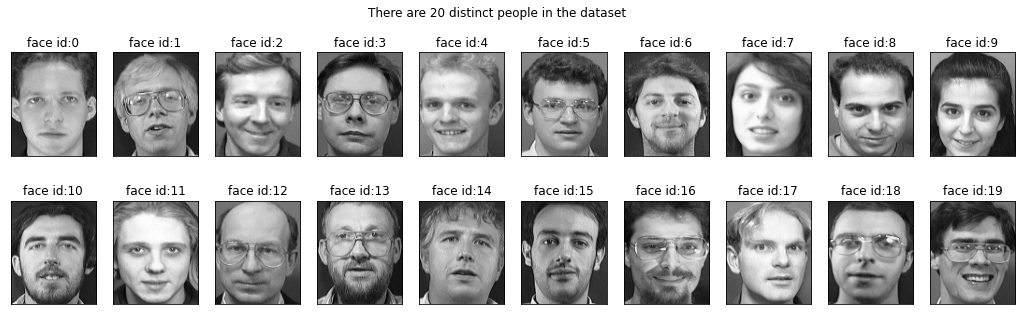

In [13]:
def show_20_distinct_people(images, unique_ids):
  #Creating 2*10 subplots in  18x5 figure size
  fig, axarr=plt.subplots(nrows=2, ncols=10, figsize=(18, 5))
  
  #For easy iteration flattened 2X10 subplots matrix to 20 array
  axarr=axarr.flatten()

  #iterating over user ids
  for unique_id in unique_ids:
    image_index=unique_id*12
    axarr[unique_id].imshow(images[image_index], cmap='gray')
    axarr[unique_id].set_xticks([])
    axarr[unique_id].set_yticks([])
    axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 20 distinct people in the dataset")

show_20_distinct_people(X_train_img, np.unique(data['trainY']))

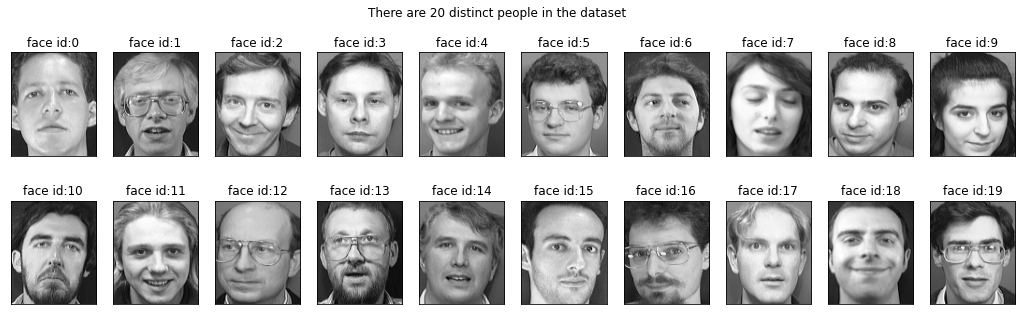

In [14]:
def show_16_distinct_people(images, unique_ids):
  #Creating 2*10 subplots in  18x5 figure size
  fig, axarr=plt.subplots(nrows=2, ncols=10, figsize=(18, 5))
  
  #For easy iteration flattened 2X10 subplots matrix to 20 array
  axarr=axarr.flatten()

  #iterating over user ids
  for unique_id in unique_ids:
    image_index=unique_id*8
    axarr[unique_id].imshow(images[image_index], cmap='gray')
    axarr[unique_id].set_xticks([])
    axarr[unique_id].set_yticks([])
    axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 20 distinct people in the dataset")

show_16_distinct_people(X_test_img, np.unique(data['testY']))

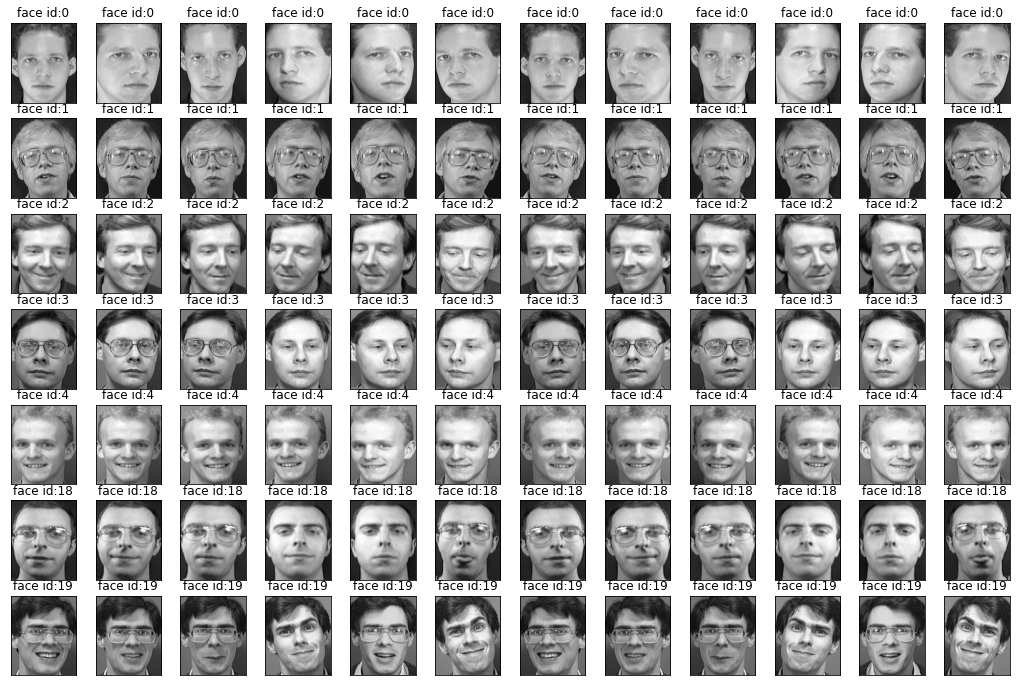

In [16]:
def show_12_faces_of_n_subject(images, subject_ids):
    cols=12
    rows=(len(subject_ids)*12)/cols 
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,12))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*12 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

show_12_faces_of_n_subject(images=X_train_img, subject_ids=[0, 1, 2 , 3, 4, 18, 19])

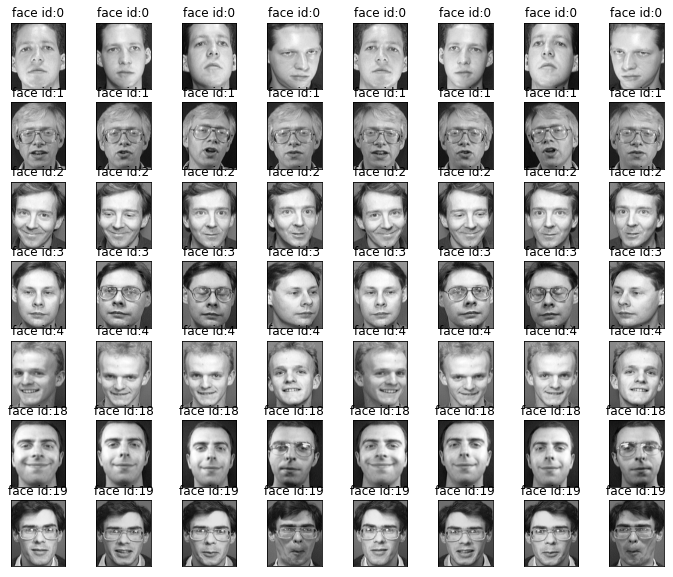

In [17]:
def show_8_faces_of_n_subject(images, subject_ids):
    cols=8
    rows=(len(subject_ids)*8)/cols 
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(12,10))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*8 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

show_8_faces_of_n_subject(images=X_test_img, subject_ids=[0, 1, 2 , 3, 4, 18, 19])

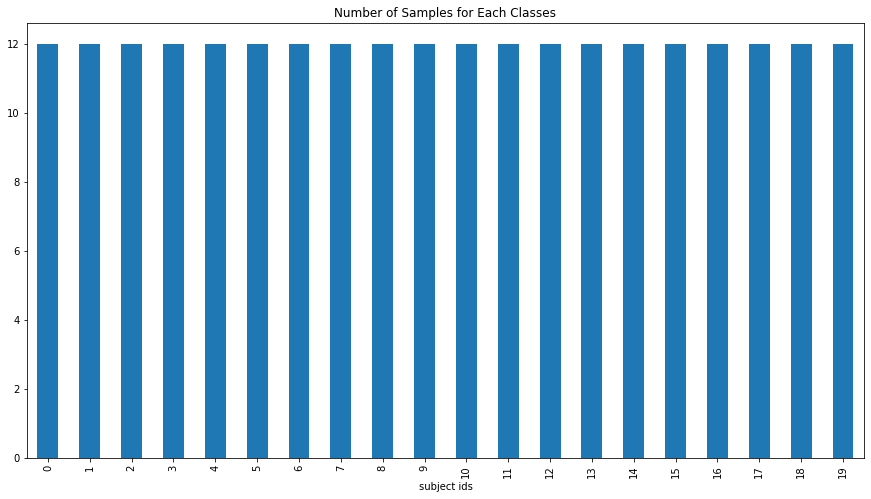

In [18]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [19]:
X_train.shape

(240, 10304)

In [20]:
X_train=  np.array([np.reshape(i, (112, 92, 1)) for i in X_train])
X_test=  np.array([np.reshape(i, (112, 92, 1)) for i in X_test])

y_train_final = tf.keras.utils.to_categorical(y_train, num_classes=20, dtype='float32')
y_test_final = tf.keras.utils.to_categorical(y_test, num_classes=20, dtype='float32')

y_train = tf.keras.utils.to_categorical(y_train, num_classes=20, dtype='float32')
y_test= tf.keras.utils.to_categorical(y_test, num_classes=20, dtype='float32')

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 112, 92, 1)
(160, 112, 92, 1)
(240,)
(160,)


In [22]:
 X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [23]:
X_valid.shape

(48, 112, 92, 1)

#input_shape = (img_height,img_width)
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(112,92,1),padding='same', activation='relu'))#3x3 is default
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(.4))
model.add(Dense(20, activation='softmax'))

# Model summary 
model.summary()

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
# Set Parameters
batchSize = 12
epochs = 200
tf.random.set_seed(2507)
np.random.seed(2507)

# Initialising the CNN
classifier = tf.keras.models.Sequential()

# Step 1 - Convolution  #No of Feature Maps, Filter, color image with channel,
classifier.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = (112, 92, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(tf.keras.layers.Flatten())
#classifier.add(tf.keras.layers.GlobalAveragePooling2D())

# Step 4 - Full connection
classifier.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 20, activation = 'softmax'))
classifier.summary()
# Compiling the CNN
#classifier.compile(optimizer = "Adam" , loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 19, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 9, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13824)             0

In [25]:
aug=ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.15,
    zoom_range=0.15,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)

In [26]:
optimizer=Adam(lr=0.0001)

In [27]:
classifier.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)

Using TensorFlow backend.


h = classifier.fit(X_train, y_train, batch_size=32,
        epochs=epochs,verbose=1,validation_split=0.2)

In [29]:
#Custom Callback

class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        
        if test_score > train_score and test_score > self.cl:
        #if test_score > self.cl:
            self.model.stop_training = True

In [30]:
X_valid.shape

(48, 112, 92, 1)

In [31]:
myR2ScoreMonitor = MyThresholdCallBack(cl=0.90)

In [32]:
bs =32
epochs=100

In [ ]:
#callbacks=[myR2ScoreMonitor])

In [60]:
h = classifier.fit(X_train, y_train, batch_size=32,
        epochs=epochs,verbose=1,steps_per_epoch=len(X_train) // bs,
    validation_data=(X_valid,y_valid),
    validation_steps=len(X_valid) // bs)

Train on 192 samples, validate on 48 samples
Epoch 1/100
192/192 [==============================] - 3s 14ms/sample - loss: 0.3248 - accuracy: 0.8854 - val_loss: 0.1330 - val_accuracy: 0.9688
Epoch 2/100
192/192 [==============================] - 3s 14ms/sample - loss: 0.2067 - accuracy: 0.9115 - val_loss: 0.2164 - val_accuracy: 0.8750
Epoch 3/100
192/192 [==============================] - 3s 13ms/sample - loss: 0.2058 - accuracy: 0.9271 - val_loss: 0.1998 - val_accuracy: 0.9062
Epoch 4/100
192/192 [==============================] - 3s 13ms/sample - loss: 0.1881 - accuracy: 0.9635 - val_loss: 0.2110 - val_accuracy: 0.8438
Epoch 5/100
192/192 [==============================] - 2s 13ms/sample - loss: 0.1730 - accuracy: 0.9531 - val_loss: 0.1758 - val_accuracy: 0.9062
Epoch 6/100
192/192 [==============================] - 3s 13ms/sample - loss: 0.1379 - accuracy: 0.9479 - val_loss: 0.1022 - val_accuracy: 0.9062
Epoch 7/100
192/192 [==============================] - 3s 13ms/sample - loss: 0

In [61]:
# training accuracy after final epoch
h.history['accuracy'][-1]

1.0

In [62]:
# test accuracy after final epoch
h.history['val_accuracy'][-1]

0.9375

In [63]:
trainloss,train_acc=classifier.evaluate(X_train, y_train,verbose=0)
testlossloss,test_acc=classifier.evaluate(X_valid, y_valid,verbose=0)
print("train:%3f,Test:%3f"%(train_acc,test_acc))



train:1.000000,Test:0.958333


In [64]:
print('test loss',testlossloss)
print('accuracy',test_acc*100)

test loss 0.2184815804939717
accuracy 95.83333134651184


In [65]:
loss_train,train_acc=classifier.evaluate(X_train, y_train,verbose=0)
loss_test,test_acc=classifier.evaluate(X_valid, y_valid,verbose=0)
print("train_accurcy:%.3f,Testaccury:%.3f"%(train_acc,test_acc*100))
print("loss_train:%.3f,loss_acctest:%.3f"%(loss_train,loss_test))

train_accurcy:1.000,Testaccury:95.833
loss_train:0.000,loss_acctest:0.218


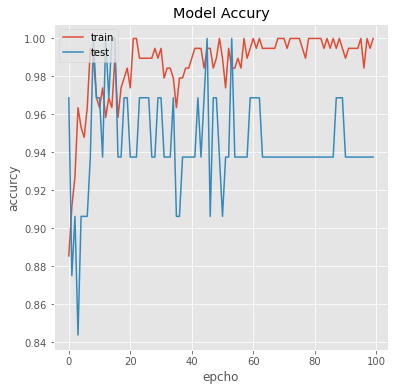

In [66]:
plt.figure(figsize =(6,6))
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accury')
plt.ylabel('accurcy')
plt.xlabel('epcho')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

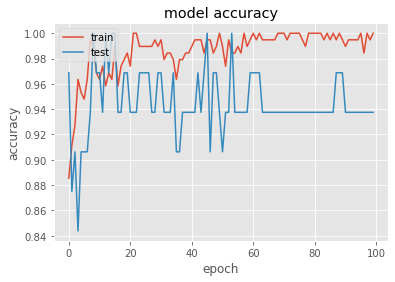

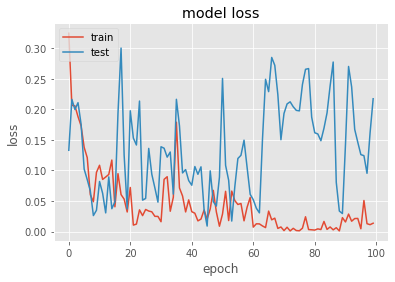

In [67]:
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
predicted1 =np.array( classifier.predict_classes(X_test))

In [69]:
print("accuracy : ",accuracy_score(y_test,predicted1)*100)

accuracy :  94.375


In [70]:
prediction = classifier.predict_classes(X_test)


print("accuracy : ",accuracy_score(y_test,prediction)*100)

accuracy :  94.375


In [71]:
from keras.utils import np_utils

y_test1 = np_utils.to_categorical(y_test, 20)

In [72]:
ynew= classifier.predict_classes(X_test)


print("accuracy : ",accuracy_score(y_test,ynew)*100)

accuracy :  94.375


In [73]:
cnf_matrix=confusion_matrix(np.array(y_test), ynew)
import itertools

Confusion matrix, without normalization
[[7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 4 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


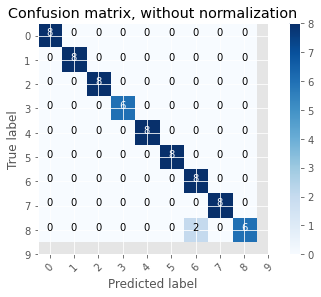

Confusion matrix, without normalization


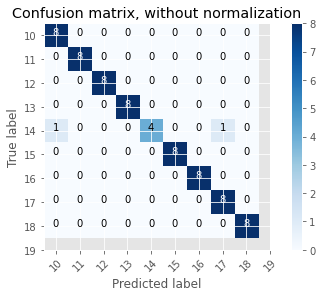

Confusion matrix:
[[7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 4 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

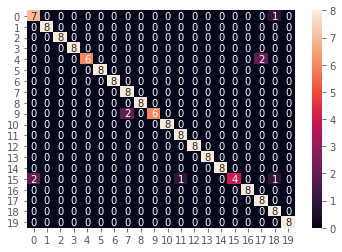

In [76]:
import seaborn as sns
c = confusion_matrix(y_test,prediction)
sns.heatmap(c,annot = True)

In [77]:
#predictios
classifier.save('FaceRecognition.tf2')

INFO:tensorflow:Assets written to: FaceRecognition.tf2\assets


In [78]:
predictions = classifier.predict(X_test)

In [79]:
def plot_image(i, predictions, trueLabel, img):
  predictions_array, true_label, image = predictions[i], trueLabel[i], img[i]
  plt.xticks([])
  plt.yticks([])
  #plt.imshow(x_test_edited[0].reshape(112,92))
  plt.imshow(image.reshape(112,92), cmap="gray")
  actual_label = np.argmax(true_label)
  predicted_label = np.argmax(predictions_array)
  # print("True Label: ",y_test_final[1],"\n")
  # print("Prediction: ", predictions[1], "\n")
  print("Actual Label is: ", actual_label)
  print("Predicted Label is: ", predicted_label)
  if predicted_label == actual_label:
    color = "blue"
  else:
    color = "red"
  plt.xlabel("Face ID {} predicted matches {:2.0f}% to ({})".format(predicted_label, 100*np.max(predictions_array), actual_label, color=color))


Actual Label is:  0
Predicted Label is:  0


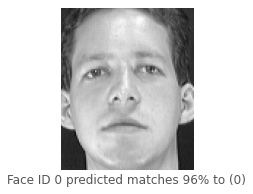

In [80]:
i = 0
plt.figure(figsize=(6,3))
plot_image(i, predictions, y_test, X_test)

Actual Label is:  0
Predicted Label is:  4


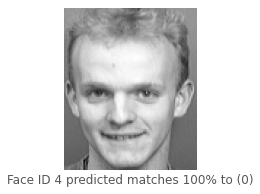

In [81]:
j = 34
plt.figure(figsize=(6,3))
plot_image(j, predictions, y_test, X_test)

Actual Label is:  0
Predicted Label is:  0


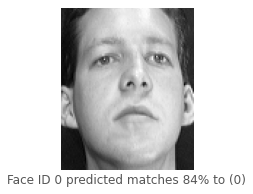

In [83]:
k = 2
plt.figure(figsize=(6,3))
plot_image(k, predictions,  y_test, X_test)

# by Harsha Teja Bolla